In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## LOAD DATASET

In [2]:
f1=pd.read_csv("Mall_Customers.csv")

In [3]:
f1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
f1.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### 3)PERFORM VISUALIZATIONS

## 3.1) Univariate Analysis

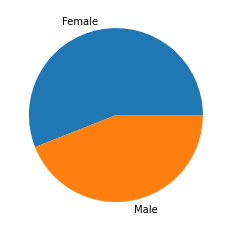

In [6]:
#pie chart
data1=f1.groupby("Gender",axis=0)
plt.pie(data1.count()["Age"], labels=data1.indices)
plt.show()

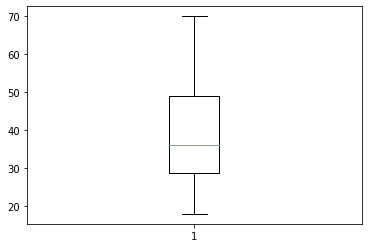

In [7]:
#boxplot
plt.boxplot(f1["Age"])
plt.show()

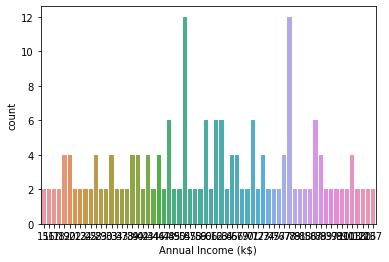

In [9]:
#countplot
sns.countplot(x=f1["Annual Income (k$)"])
plt.show()

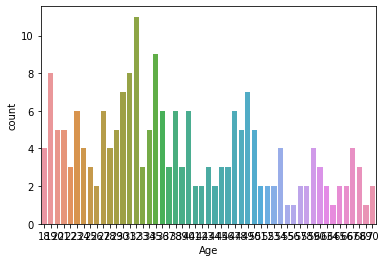

In [10]:
#countplot
sns.countplot(x=f1["Age"])
plt.show()

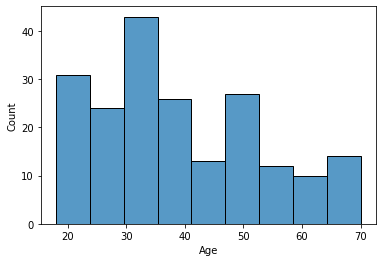

In [11]:
#histplot
sns.histplot(f1["Age"])
plt.show()

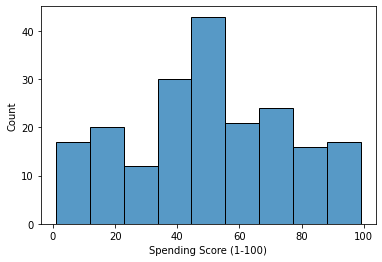

In [12]:
#histplot
sns.histplot(f1["Spending Score (1-100)"])
plt.show()

## Bi-variate Analysis

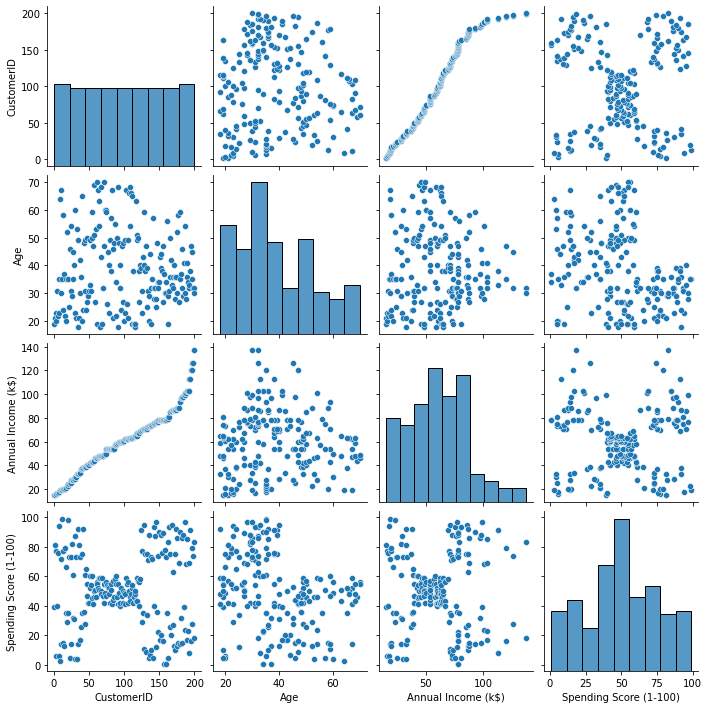

In [13]:
#pairplot
sns.pairplot(f1)
plt.show()

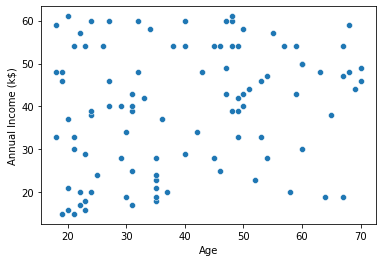

In [14]:
#scatterplot for Age and Annual Income (k$)
sns.scatterplot(x=f1.iloc[:100,:]["Age"],y=f1.iloc[:100,:]["Annual Income (k$)"])
plt.show()

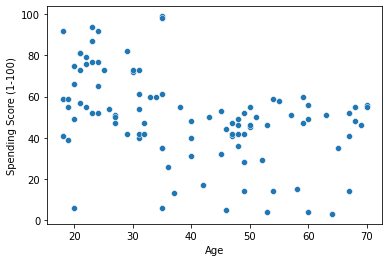

In [19]:
#scatterplot for Age and Spending Score (1-100)
sns.scatterplot(x=f1.iloc[:100,:]["Age"],y=f1.iloc[:100,:]["Spending Score (1-100)"])
plt.show()

## Multi variate Analysis

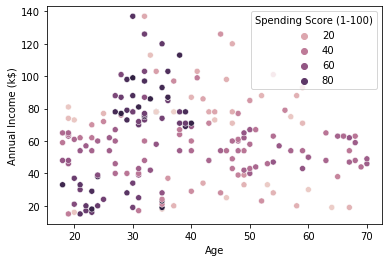

In [23]:
#scatterplot forAge, Annual Income (k$) and Spending Score (1=100)
sns.scatterplot(x=f1.iloc[:200,:]["Age"],y=f1.iloc[:200,:]["Annual Income (k$)"],hue=f1.iloc[:200,:]["Spending Score (1-100)"])
plt.show()

## 4) PERFORM DESCRIPTIVE STATIONS STATISTICS ON THE DATASET

In [24]:
f1.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [25]:
f1.mode(numeric_only=True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,32.0,54.0,42.0
1,2,NaN,78.0,NaN
2,3,NaN,NaN,NaN
3,4,NaN,NaN,NaN
4,5,NaN,NaN,NaN
...,...,...,...,...
195,196,NaN,NaN,NaN
196,197,NaN,NaN,NaN
197,198,NaN,NaN,NaN
198,199,NaN,NaN,NaN


In [27]:
f1.median(numeric_only=True)

CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [28]:
f1.skew(numeric_only=True)

CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [29]:
f1.kurt(numeric_only=True)

CustomerID               -1.200000
Age                      -0.671573
Annual Income (k$)       -0.098487
Spending Score (1-100)   -0.826629
dtype: float64

## 5)HANDLING MISSING VALUES

In [30]:
#find the null columns
f1.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## 6)FIND THE OUTLIERS AND REPLACE THE OUTLIERS

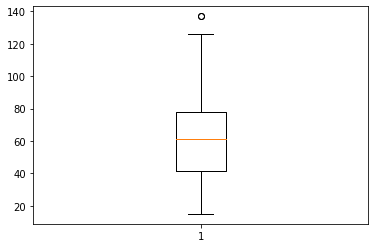

In [31]:
#finf outliers-Annual Income (k$)
plt.boxplot(f1["Annual Income (k$)"])
plt.show()

In [35]:
#handlingoutliers: InterQuartile Range(IQR)
Q3=np.percentile(f1["Annual Income (k$)"],75,interpolation='midpoint')
Q1=np.percentile(f1["Annual Income (k$)"],25,interpolation='midpoint')
IQR=Q3-Q1
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

Q1: 41.0
Q3: 78.0
IQR: 37.0


In [37]:
UpperOutlayers=Q3+1.5*IQR
lowerOutlayers=Q1-1.5*IQR
print(UpperOutlayers)
print(lowerOutlayers)

133.5
-14.5


In [43]:
f1.drop(np.where(f1["Annual Income (k$)"]>=UpperOutlayers)[0],inplace=True)
f1.drop(np.where(f1["Annual Income (k$)"]<=lowerOutlayers)[0],inplace=True)

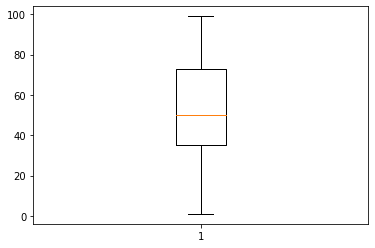

In [44]:
#find outliers-Spending Score (1-100)
plt.boxplot(f1["Spending Score (1-100)"])
plt.show()

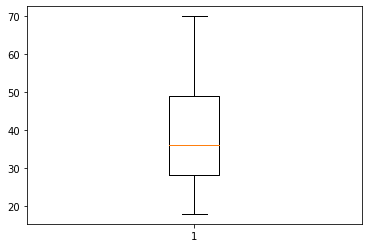

In [46]:
#find outliers-Age
plt.boxplot(f1["Age"])
plt.show()

## 7) CHECK FOR CATEGORIAL COLUMNS AND PEFORMANCE ENCODING

In [47]:
f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              198 non-null    int64 
 1   Gender                  198 non-null    object
 2   Age                     198 non-null    int64 
 3   Annual Income (k$)      198 non-null    int64 
 4   Spending Score (1-100)  198 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [48]:
from sklearn.preprocessing import LabelEncoder

In [51]:
encod=LabelEncoder()
f1['Spending Score (1-100)']=encod.fit_transform(f1['Spending Score (1-100)'])

In [53]:
print(f1["Spending Score (1-100)"].unique())

[29 66  4 63 30 62 78  1 58 12 82 13 11 65 27 54 23 81 59  3 67 25 51 24
 71  2 76 15 20 61 28 22 53 45 37 32 42 50 44 35 31 40 36 41 46 49 38 39
 43 34 47 48 33 75 79  9  7 26 57 72  5  8 77 10 80 60 17 74 16 14 73  0
 64 68 21 52 70 56 19 55 69 18  6]


In [54]:
f1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,29
1,2,Male,21,15,66
2,3,Female,20,16,4
3,4,Female,23,16,63
4,5,Female,31,17,30


In [55]:
f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              198 non-null    int64 
 1   Gender                  198 non-null    object
 2   Age                     198 non-null    int64 
 3   Annual Income (k$)      198 non-null    int64 
 4   Spending Score (1-100)  198 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## SCALING THE DATA

In [56]:
from sklearn.preprocessing import scale

In [58]:
x=f1.drop(columns=['Gender'],axis=1)
x.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,29
1,2,21,15,66
2,3,20,16,4
3,4,23,16,63
4,5,31,17,30


In [59]:
x=scale(x)
x

array([[-1.72332506, -1.42541358, -1.77917141, -0.53879067],
       [-1.70582937, -1.2823665 , -1.77917141,  1.19318845],
       [-1.68833368, -1.35389004, -1.73944701, -1.70904683],
       [-1.670838  , -1.13931942, -1.73944701,  1.05275771],
       [-1.65334231, -0.5671311 , -1.69972262, -0.49198042],
       [-1.63584663, -1.21084296, -1.69972262,  1.00594747],
       [-1.61835094, -0.28103694, -1.65999822, -1.70904683],
       [-1.60085525, -1.13931942, -1.65999822,  1.75491141],
       [-1.58335957,  1.79314572, -1.62027383, -1.84947757],
       [-1.56586388, -0.63865464, -1.62027383,  0.81870648],
       [-1.5483682 ,  2.00771635, -1.62027383, -1.33456486],
       [-1.53087251, -0.28103694, -1.62027383,  1.9421524 ],
       [-1.51337683,  1.36400448, -1.58054943, -1.28775461],
       [-1.49588114, -1.06779588, -1.58054943,  1.05275771],
       [-1.47838545, -0.13798986, -1.58054943, -1.3813751 ],
       [-1.46088977, -1.21084296, -1.58054943,  1.14637821],
       [-1.44339408, -0.

In [60]:
x.mean()

1.570012358055777e-17

In [61]:
x.std()

1.0

## 9) PERFORM CLUSTERING ALGORITHM

In [65]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [66]:
wcss

[791.9999999999998,
 508.44874485439107,
 368.58328054500737,
 257.0929393027723,
 206.35125359279914,
 156.94571620133905,
 140.89593744774663,
 125.07516278994356,
 114.55898071571418,
 101.0295653122749]

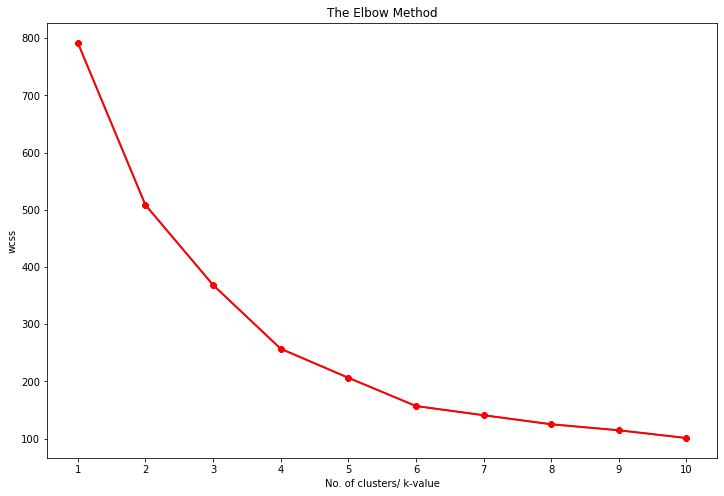

In [67]:
plt.figure(figsize=(12,8))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("No. of clusters/ k-value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("wcss")
plt.show()

In [68]:
#BUILD MODEL
kmodel=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=kmodel.fit_predict(x)

In [69]:
kmodel.labels_

array([0, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0,
       4, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3])

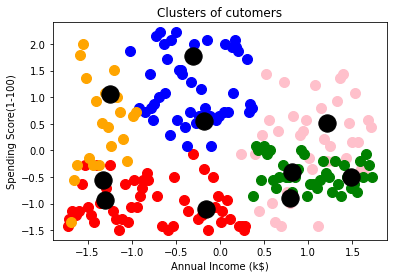

In [70]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='pink',label='Cluster 3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='green',label='Cluster 4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c='orange',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],s=300,c='black',label='Centroids')
plt.title('Clusters of cutomers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()